# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
***
## 1. Описание задания.
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

## 2. Выполнение работы.

#### Задание 1.

Подключаем необходимые библиотеки:

In [1]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

Выберем датасет для выполения лабораторной работы. В данном датасете рассматриваются параметры вин, выращенных на разных винодельнях в одном регионе Италии.

In [2]:
import pandas as pd
from sklearn.datasets import *

wine = load_wine()
pd_wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
pd_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Обозначим задачи, которые нам необходимо решить:

In [3]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

#### Задание 2

Разделим выборку на две части.

In [4]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

In [5]:
print("Размер обучающей выборки: {0} {1}".format(wine_X_train.shape, wine_Y_train.shape))
print("Размер тестовой выборки: {0} {1}".format(wine_X_test.shape, wine_Y_test.shape))

Размер обучающей выборки: (89, 13) (89,)
Размер тестовой выборки: (89, 13) (89,)


#### Задание 3

Построим базовые модели на основе метода ближайших соседей. Пусть количество соседей будет равно 5 (пока гиперпараметр задан произвольно).

In [6]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

cl1 = KNeighborsClassifier(n_neighbors = 5) 
cl1.fit(wine_X_train, wine_Y_train)
target1 = cl1.predict(wine_X_test)
print("Предсказанные значения для тестовой выборки: {0}".format(target1))

Предсказанные значения для тестовой выборки: [1 1 2 1 0 1 2 0 2 1 0 1 1 0 2 1 1 0 1 0 0 1 2 0 2 1 0 0 0 2 1 2 1 0 2 1 1
 1 1 0 0 2 2 2 0 2 1 0 0 0 1 2 2 0 1 0 0 1 1 1 1 0 2 2 1 0 1 0 1 2 1 1 2 2
 1 1 2 2 0 2 1 0 1 0 2 2 1 0 1]


Далее при помощи различных метрик оценим качество полученной модели путем сопоставления её с истинными значениями.

##### 1) Accuracy - метрика возвращает процент совпадений предсказаний и истинных значений.

In [7]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

score = accuracy_score(wine_Y_test, target1) * 100
print("Полученный процент совпадений: {0}".format(score))

Полученный процент совпадений: 70.78651685393258


##### 2) Матрица ошибок - в виде матрицы представляется количество верно и ошибочно классифицированных данных.

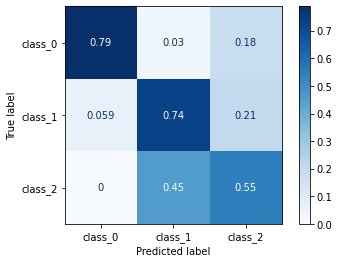

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(wine_Y_test, target1, labels=[0, 1, 2])
plot_confusion_matrix(cl1, wine_X_test, wine_Y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

##### 3)  Precision, recall и F-мера

(описания для бинарных таблиц)

Precision - доля верно предсказанных положительных объектов на из всех объектов, которые верно или неверное определили как положительные.

Recall - доля верно предсказанных положительных объектов из всех действительно положительных.

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

ps1 = precision_score(wine_Y_test, target1, average='micro')
ps2 = precision_score(wine_Y_test, target1, average='macro')
ps3 = precision_score(wine_Y_test, target1, average='weighted')

rs1 = recall_score(wine_Y_test, target1, average='micro')
rs2 = recall_score(wine_Y_test, target1, average='macro')
rs3 = recall_score(wine_Y_test, target1, average='weighted')

print("Precision (сумма по всем классам): {0}".format(round(ps1, 3)))
print("Precision (среднее значение от расчетов по классам в отдельности): {0}".format(round(ps2, 3)))
print("Precision (аналогично предыдущему, но с учетом веса): {0}".format(round(ps3, 3)))
print("\n")
print("Recall (сумма по всем классам): {0}".format(round(rs1, 3)))
print("Recall (среднее значение от расчетов по классам в отдельности): {0}".format(round(rs2, 3)))
print("Recall (аналогично предыдущему, но с учетом веса): {0}".format(round(rs3, 3)))

Precision (сумма по всем классам): 0.708
Precision (среднее значение от расчетов по классам в отдельности): 0.701
Precision (аналогично предыдущему, но с учетом веса): 0.728


Recall (сумма по всем классам): 0.708
Recall (среднее значение от расчетов по классам в отдельности): 0.69
Recall (аналогично предыдущему, но с учетом веса): 0.708


F-мера - объединяет Precision и Recall

In [10]:
fs1 = precision_score(wine_Y_test, target1, average='micro')
fs2 = precision_score(wine_Y_test, target1, average='macro')
fs3 = precision_score(wine_Y_test, target1, average='weighted')

print("F (сумма по всем классам): {0}".format(round(fs1, 3)))
print("F (среднее значение от расчетов по классам в отдельности): {0}".format(round(fs2, 3)))
print("F (аналогично предыдущему, но с учетом веса): {0}".format(round(fs3, 3)))

F (сумма по всем классам): 0.708
F (среднее значение от расчетов по классам в отдельности): 0.701
F (аналогично предыдущему, но с учетом веса): 0.728


#### Задание 4

Теперь осознанно подберем гиперпараметр K разлиными методами.

##### 1) GridSearch

Наиболее простой способ, осуществляющий перебор возможных значений гиперпараметра. Для его дополоения также будем использовать кросс-валидацию, которая позволяет выбирать различные разбиения исходной выборки.

In [11]:
# Сформируем массив возможных параметров для модели k ближайших соседей:
n_range = np.array(range(5, 61, 5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])}]

In [12]:
# Воспользуемся методом GridSearchCV
from sklearn.model_selection import GridSearchCV

clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring = 'accuracy')
# параметр cv как раз указыватет на использование кросс-валидации
clf_gs.fit(wine_X_train, wine_Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])}],
             scoring='accuracy')

Оценим результаты выполения:

In [13]:
print("Лучшее значение гиперпараметра: {0}".format(clf_gs.best_params_))
print("Лучший итог по выбранной метрике: {0}".format(clf_gs.best_score_))

Лучшее значение гиперпараметра: {'n_neighbors': 15}
Лучший итог по выбранной метрике: 0.7189542483660132


График результатов для всех вариантов параметра:

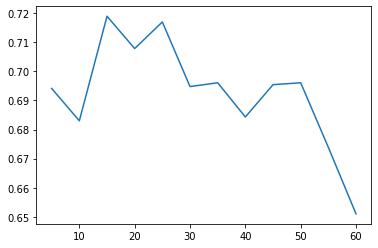

In [14]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

Рассмотрим и другой метод кросс-валидации.

Лучшее значение гиперпараметра: {'n_neighbors': 5}
Лучший итог по выбранной метрике: 0.7078651685393258


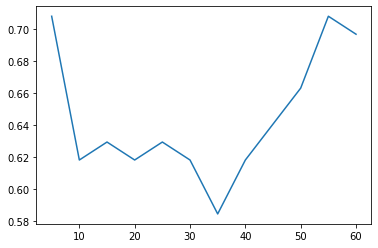

In [15]:
from sklearn.model_selection import LeaveOneOut

clf_gs1 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring = 'accuracy')
# параметр cv в данном случае означает другой метод валидации
clf_gs1.fit(wine_X_train, wine_Y_train)

print("Лучшее значение гиперпараметра: {0}".format(clf_gs1.best_params_))
print("Лучший итог по выбранной метрике: {0}".format(clf_gs1.best_score_))
plt.plot(n_range, clf_gs1.cv_results_['mean_test_score'])

##### 2) Randomized Search

Метод, работающий бестрее, чем GridSearch за счет рандомности.

In [16]:
from sklearn.model_selection import RandomizedSearchCV

clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring = 'accuracy')
# параметр cv как раз указыватет на использование кросс-валидации
clf_rs.fit(wine_X_train, wine_Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])}],
                   scoring='accuracy')

In [17]:
print("Лучшее значение гиперпараметра: {0}".format(clf_rs.best_params_))
print("Лучший итог по выбранной метрике: {0}".format(clf_rs.best_score_))

Лучшее значение гиперпараметра: {'n_neighbors': 15}
Лучший итог по выбранной метрике: 0.7189542483660132


#### Задание 5

In [18]:
print("Метрика для исходной модели: {0}".format(accuracy_score(wine_Y_test, target1)))
print("Метрика для оптимальной модели: {0}".format(clf_rs.best_score_))

Метрика для исходной модели: 0.7078651685393258
Метрика для оптимальной модели: 0.7189542483660132


Таким образом, видим, что оптимальная модель является более качественной.